In [128]:
import os
import pandas as pd
import numpy as np

output_file_path = "./dataset/combined_valeurs.txt"

combined_df = pd.read_csv(output_file_path, delimiter='\t', header=None, engine='python')

combined_df['positive_max'] = combined_df.loc[:, 19:138].apply(lambda x: x[x >= 0].max(), axis=1)
combined_df['negative_max'] = combined_df.loc[:, 19:138].apply(lambda x: x[x <= 0].min(), axis=1)
combined_df.rename(columns={0: "Date", 8: "velocity", 3: "Cycle_Number", 140: "experiment_number", 141: "position"}, inplace=True)

# Map 'position' column
combined_df['position'] = combined_df['position'].map({'Right': 0, 'Left': 1})
combined_df.drop(columns=['Date'], inplace=True)
experiment_numbers = [2, 3, 6, 7]

# Creating separate DataFrames for each experiment number
experiment_dfs = {num: combined_df[combined_df['experiment_number'] == num] for num in experiment_numbers}
table_2 = experiment_dfs[2].reset_index(drop=True)
table_3 = experiment_dfs[3].reset_index(drop=True)
table_6 = experiment_dfs[6].reset_index(drop=True)
table_7 = experiment_dfs[7].reset_index(drop=True)
table_2['id'] = range(len(table_2))
table_3['id'] = range(len(table_3))
table_6['id'] = range(len(table_6))
table_7['id'] = range(len(table_7))
tables = [table_2, table_3, table_6, table_7]
combined_df = pd.concat(tables)


# Compute mean for the group
final_df = combined_df.groupby(['id', 'velocity']).mean().reset_index()

# Rename 'velocity_group' back to 'velocity' for clarity
# final_df.rename(columns={'velocity_group': 'velocity'}, inplace=True)
final_df = final_df[final_df['velocity'] != 400.0]
final_df = final_df.groupby(['velocity', 'Cycle_Number'], as_index=False).mean()


C:\Users\alira\AppData\Local\Temp\ipykernel_2008\3354933705.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df = final_df.groupby(['velocity', 'Cycle_Number'], as_index=False).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_2008\3354933705.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df = final_df.groupby(['velocity', 'Cycle_Number'], as_index=False).mean()


In [129]:
final_df


,velocity,Cycle_Number,id,1,2,4,5,6,7,9,...,134,135,136,137,138,139,experiment_number,position,positive_max,negative_max
0,160.0,1772.25,80.5,300.65650,0.0,3.0,4.5,1.0,1.0,4.116579,...,0.048828,-0.018311,3.051662e-03,0.036621,-0.033569,NaN,4.5,0.5,1.150514,-1.901244
1,160.0,3009.75,81.5,601.11325,0.0,3.0,4.5,1.0,1.0,4.116579,...,-0.006104,0.048828,6.713869e-02,0.051880,0.027466,NaN,4.5,0.5,1.354982,-1.931764
2,160.0,4246.75,82.5,901.65225,0.0,3.0,4.5,1.0,1.0,4.116579,...,0.051880,0.006104,5.000000e-08,0.051880,-0.012207,NaN,4.5,0.5,1.211550,-1.242066
3,160.0,5483.50,83.5,1202.14075,0.0,3.0,4.5,1.0,1.0,4.116579,...,-0.045776,-0.018310,1.220712e-02,0.000000,0.073242,NaN,4.5,0.5,1.144410,-1.376344
4,160.0,6721.00,84.5,1502.75775,0.0,3.0,4.5,1.0,1.0,4.116579,...,0.067139,0.021362,1.129150e-01,0.097656,0.103760,NaN,4.5,0.5,1.202395,-1.400756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,380.0,188809.50,1157.0,19230.41400,0.0,3.0,4.5,1.0,1.0,9.776876,...,0.201417,0.976561,2.056884e+00,2.258303,2.093505,NaN,6.5,0.5,8.648687,-12.658663
594,380.0,191746.00,1158.0,19530.91400,0.0,3.0,4.5,1.0,1.0,9.776876,...,0.079345,1.025391,2.026366e+00,2.191162,2.319335,NaN,6.5,0.5,8.746323,-12.957760
595,380.0,194684.50,1159.0,19831.52350,0.0,3.0,4.5,1.0,1.0,9.776876,...,-0.115965,0.970458,2.209474e+00,2.642822,2.478029,NaN,6.5,0.5,8.477785,-13.079812
596,380.0,197626.00,1160.0,20132.34350,0.0,3.0,4.5,1.0,1.0,9.776876,...,-0.262450,0.878907,1.776123e+00,1.879882,2.008056,NaN,6.5,0.5,7.641602,-11.700432


In [113]:
combined_df.iloc[0,10:25]

10         1.0
11         0.0
12         0.0
13         0.0
14         NaN
15   -0.010842
16   -0.009141
17   -0.005062
18         NaN
19    0.170898
20    0.048828
21    0.073242
22    0.073242
23   -0.024414
24    0.097656
Name: 0, dtype: object

In [114]:
displacement_df = pd.read_csv("../data/dataset/combined_with_experiment.csv")

In [115]:
displacement_df.head()

,Period,Cycle_Number,velocity,experiment_number,position,displacement,smoothed_displacement
0,300.641,1542,160.0,2,0,0.000197,0.000167
1,600.656,2777,160.0,2,0,0.000197,0.000169
2,901.156,4014,160.0,2,0,0.000187,0.000166
3,1201.391,5249,160.0,2,0,0.000205,0.000183
4,1502.000,6489,160.0,2,0,0.000190,0.000166


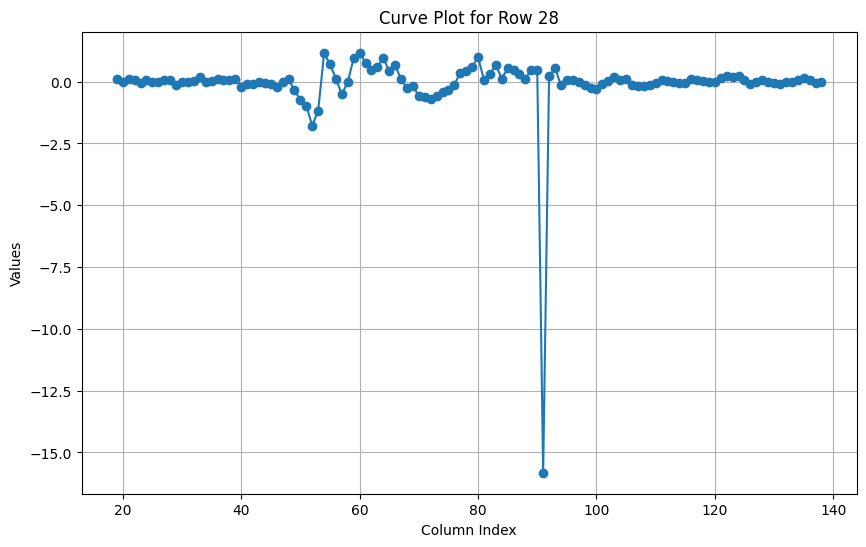

In [116]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_row_curve(df, row_index):
    # Ensure row_index is within the range of the DataFrame
    if row_index < 0 or row_index >= len(df):
        print("Row index is out of range.")
        return
    
    # Select the values from column 19 to column 138 (inclusive) in the specified row
    y_values = df.iloc[row_index, 19:139].values
    
    # Generate x values as a range for plotting
    x_values = range(19, 139)
    
    # Plot the curve
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o')
    plt.xlabel("Column Index")
    plt.ylabel("Values")
    plt.title(f"Curve Plot for Row {row_index}")
    plt.grid()
    plt.show()

# Example usage
plot_row_curve(combined_df, 28)

In [117]:
import pandas as pd
import numpy as np


# Calculate positive_max and negative_max
combined_df['positive_max'] = combined_df.loc[:, 19:138].apply(lambda x: x[x >= 0].max(), axis=1)
combined_df['negative_max'] = combined_df.loc[:, 19:138].apply(lambda x: x[x <= 0].min(), axis=1)

combined_df

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,positive_max,negative_max
0,26/01/2005 17:49:45,300.641,0,1542,3,5,1,1,160.0,4.116579,...,0.024414,-0.097656,0.122070,0.097656,0.024414,NaN,2,Right,1.36719,-1.63574
1,26/01/2005 17:54:45,600.656,0,2777,3,5,1,1,160.0,4.116579,...,0.024414,0.000000,0.073242,0.146484,-0.073242,NaN,2,Right,1.31836,-3.78418
2,26/01/2005 17:59:46,901.156,0,4014,3,5,1,1,160.0,4.116579,...,0.048828,0.024414,-0.097656,-0.024414,0.000000,NaN,2,Right,1.19629,-1.85547
3,26/01/2005 18:04:46,1201.391,0,5249,3,5,1,1,160.0,4.116579,...,-0.146484,-0.195312,-0.170898,-0.097656,0.024414,NaN,2,Right,1.24512,-2.07520
4,26/01/2005 18:09:46,1502.000,0,6489,3,5,1,1,160.0,4.116579,...,0.000000,0.000000,0.024414,-0.097656,-0.122070,NaN,2,Right,1.36719,-2.27051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,29/06/2005 16:52:00,13521.859,0,140079,3,4,1,1,400.0,10.291450,...,-3.198240,0.097656,2.880860,1.831050,2.099610,NaN,7,Left,21.06930,-22.94920
5022,29/06/2005 16:57:00,13822.250,0,143168,3,4,1,1,400.0,10.291450,...,-2.734380,0.610352,3.662110,1.928710,2.246090,NaN,7,Left,15.55180,-22.55860
5023,29/06/2005 17:02:01,14123.312,0,146269,3,4,1,1,400.0,10.291450,...,-1.513670,-0.244141,2.929690,2.001950,1.538090,NaN,7,Left,9.03320,-28.83300
5024,29/06/2005 17:07:02,14424.187,0,149363,3,4,1,1,400.0,10.291450,...,-1.757810,-1.440430,1.635740,2.319340,1.977540,NaN,7,Left,10.27830,-47.07030


In [118]:
combined_df.rename(columns={0: "Date", 8: "velocity", 3: "Cycle_Number", 140: "experiment_number", 141: "position"}, inplace=True)

# Map 'position' column
combined_df['position'] = combined_df['position'].map({'Right': 0, 'Left': 1})
combined_df.drop(columns=['Date'], inplace=True)
# Filter by experiment numbers
experiment_numbers = [2, 3, 6, 7]
experiment_dfs = {num: combined_df[combined_df['experiment_number'] == num] for num in experiment_numbers}
table_2 = experiment_dfs[2].reset_index(drop=True)
table_3 = experiment_dfs[3].reset_index(drop=True)
table_6 = experiment_dfs[6].reset_index(drop=True)
table_7 = experiment_dfs[7].reset_index(drop=True)
table_2['id'] = range(len(table_2))
table_3['id'] = range(len(table_3))
table_6['id'] = range(len(table_6))
table_7['id'] = range(len(table_7))


table_3

,1,2,Cycle_Number,4,5,6,7,velocity,9,10,...,135,136,137,138,139,experiment_number,position,positive_max,negative_max,id
0,300.828,0,1972,3,5,1,1,160.0,4.116579,1.0,...,-0.146484,-0.170898,-0.097656,0.024414,NaN,3,0,1.147460,-3.808590,0
1,601.562,0,3211,3,5,1,1,160.0,4.116579,1.0,...,0.146484,0.048828,0.048828,0.122070,NaN,3,0,1.733400,-2.954100,1
2,902.234,0,4449,3,5,1,1,160.0,4.116579,1.0,...,0.146484,0.024414,0.073242,0.048828,NaN,3,0,0.878906,-0.976562,2
3,1202.812,0,5687,3,5,1,1,160.0,4.116579,1.0,...,-0.048828,0.073242,0.000000,0.048828,NaN,3,0,1.000980,-1.489260,3
4,1503.046,0,6921,3,5,1,1,160.0,4.116579,1.0,...,-0.024414,0.146484,0.146484,0.122070,NaN,3,0,1.171880,-1.440430,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,18028.797,0,186154,3,4,1,1,400.0,10.291450,1.0,...,-2.636720,3.320310,5.493160,2.587890,NaN,3,1,19.531200,-34.887700,1183
1184,18329.656,0,189249,3,4,1,1,400.0,10.291450,1.0,...,-1.904300,3.442380,5.273440,3.222660,NaN,3,1,20.288100,-34.350600,1184
1185,18630.062,0,192343,3,4,1,1,400.0,10.291450,1.0,...,-3.466800,1.635740,5.688480,1.953130,NaN,3,1,20.556600,-33.374000,1185
1186,18930.125,0,195427,3,4,1,1,400.0,10.291450,1.0,...,-2.099610,0.463867,7.641600,2.539060,NaN,3,1,21.484400,-35.327100,1186


In [119]:
table_7

,1,2,Cycle_Number,4,5,6,7,velocity,9,10,...,135,136,137,138,139,experiment_number,position,positive_max,negative_max,id
0,300.469,0,1764,3,5,1,1,160.0,4.116579,1.0,...,-0.024414,0.048828,-0.048828,-0.122070,NaN,7,0,1.025390,-1.58691,0
1,600.610,0,2998,3,5,1,1,160.0,4.116579,1.0,...,0.024414,0.097656,0.024414,0.000000,NaN,7,0,1.269530,-1.07422,1
2,900.828,0,4236,3,5,1,1,160.0,4.116579,1.0,...,-0.048828,0.024414,0.073242,0.000000,NaN,7,0,1.123050,-1.19629,2
3,1201.000,0,5468,3,5,1,1,160.0,4.116579,1.0,...,-0.073242,0.097656,0.097656,0.097656,NaN,7,0,1.318360,-1.41602,3
4,1502.188,0,6708,3,5,1,1,160.0,4.116579,1.0,...,-0.219727,0.146484,0.170898,0.122070,NaN,7,0,0.854492,-1.31836,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,13521.859,0,140079,3,4,1,1,400.0,10.291450,1.0,...,0.097656,2.880860,1.831050,2.099610,NaN,7,1,21.069300,-22.94920,1319
1320,13822.250,0,143168,3,4,1,1,400.0,10.291450,1.0,...,0.610352,3.662110,1.928710,2.246090,NaN,7,1,15.551800,-22.55860,1320
1321,14123.312,0,146269,3,4,1,1,400.0,10.291450,1.0,...,-0.244141,2.929690,2.001950,1.538090,NaN,7,1,9.033200,-28.83300,1321
1322,14424.187,0,149363,3,4,1,1,400.0,10.291450,1.0,...,-1.440430,1.635740,2.319340,1.977540,NaN,7,1,10.278300,-47.07030,1322


In [122]:
tables = [table_2, table_3, table_6, table_7]
combined_df = pd.concat(tables)

# Custom grouping function to merge velocities within a threshold of 5
def custom_grouping(df, threshold=5):
    df = df.sort_values(by=['id', 'velocity'])  # Sort to ensure grouping works
    df['velocity_group'] = (df['velocity'] // threshold) * threshold  # Group velocities by threshold
    return df

# Apply custom grouping
grouped_df = custom_grouping(combined_df)

# Compute mean for the group
final_df = grouped_df.groupby(['id', 'velocity_group']).mean().reset_index()

# Rename 'velocity_group' back to 'velocity' for clarity
# final_df.rename(columns={'velocity_group': 'velocity'}, inplace=True)
final_df = final_df[final_df['velocity'] != 400.0]


In [ ]:
final_df

,id,velocity_group,1,2,Cycle_Number,4,5,6,7,velocity,...,134,135,136,137,138,139,experiment_number,position,positive_max,negative_max
0,0,160.0,300.65650,0.0,1772.25,3.0,5.0,1.0,1.0,160.0,...,0.054932,-0.073242,0.012207,0.012207,-0.061035,NaN,4.5,0.0,1.159667,-2.166745
1,1,160.0,601.11325,0.0,3009.75,3.0,5.0,1.0,1.0,160.0,...,-0.012207,0.067139,0.048828,0.036621,-0.006104,NaN,4.5,0.0,1.403810,-2.490235
2,2,160.0,901.65225,0.0,4246.75,3.0,5.0,1.0,1.0,160.0,...,0.048828,0.054932,0.012207,0.024414,-0.030517,NaN,4.5,0.0,1.116944,-1.367188
3,3,160.0,1202.14075,0.0,5483.50,3.0,5.0,1.0,1.0,160.0,...,-0.091553,-0.054932,0.006104,0.000000,0.054932,NaN,4.5,0.0,1.153565,-1.568608
4,4,160.0,1502.75775,0.0,6721.00,3.0,5.0,1.0,1.0,160.0,...,-0.012207,-0.073242,0.054931,0.054931,0.030517,NaN,4.5,0.0,1.135255,-1.666260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1191,380.0,19230.41400,0.0,188809.50,3.0,4.0,1.0,1.0,380.0,...,0.805665,1.257322,2.014160,1.953126,1.879885,NaN,6.5,1.0,7.641610,-11.962875
1322,1192,380.0,19530.91400,0.0,191746.00,3.0,4.0,1.0,1.0,380.0,...,0.329590,1.013182,1.965330,1.831053,1.721190,NaN,6.5,1.0,7.690405,-12.438970
1323,1193,380.0,19831.52350,0.0,194684.50,3.0,4.0,1.0,1.0,380.0,...,0.244140,0.854491,1.831056,2.221678,1.977538,NaN,6.5,1.0,7.031250,-12.988275
1324,1194,380.0,20132.34350,0.0,197626.00,3.0,4.0,1.0,1.0,380.0,...,0.500488,1.086426,1.708985,1.623535,1.770018,NaN,6.5,1.0,6.042480,-11.132815


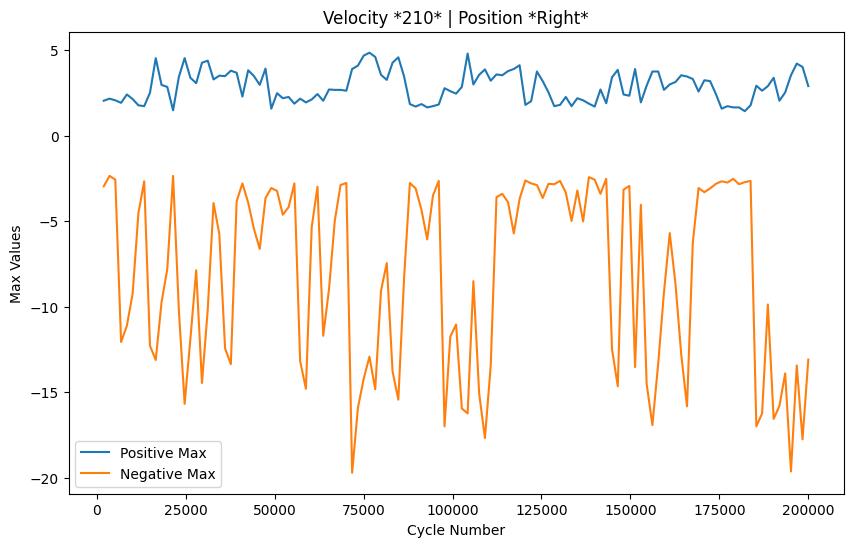

In [10]:
import matplotlib.pyplot as plt

# Assuming 'cycle_number' corresponds to column 3 in the given data
velocity = 210
position = 'Right'

df = combined_df[(combined_df[8]==velocity)&(combined_df[140]==2)&(combined_df[141]==position)]
cycle_number = df[3]

# Plotting positive_max and negative_max against cycle_number
plt.figure(figsize=(10, 6))
plt.plot(cycle_number, df['positive_max'], label='Positive Max')
plt.plot(cycle_number, df['negative_max'], label='Negative Max')

# Adding labels and title
plt.xlabel('Cycle Number')
plt.ylabel('Max Values')
plt.title(f'Velocity *{velocity}* | Position *{position}*')
plt.legend()
plt.show()


In [11]:
displacement_df[(displacement_df['velocity'] == 160) & (displacement_df['experiment_number'] == 2) & (displacement_df['position'] == 0)]

,Period,Cycle_Number,velocity,experiment_number,position,displacement,smoothed_displacement
0,300.641,1542,160.0,2,0,0.000197,0.000167
1,600.656,2777,160.0,2,0,0.000197,0.000169
2,901.156,4014,160.0,2,0,0.000187,0.000166
3,1201.391,5249,160.0,2,0,0.000205,0.000183
4,1502.000,6489,160.0,2,0,0.000190,0.000166
...,...,...,...,...,...,...,...
156,47179.187,194525,160.0,2,0,0.000185,0.000161
157,47479.891,195763,160.0,2,0,0.000190,0.000169
158,47780.484,197001,160.0,2,0,0.000195,0.000166
159,48080.625,198236,160.0,2,0,0.000185,0.000157


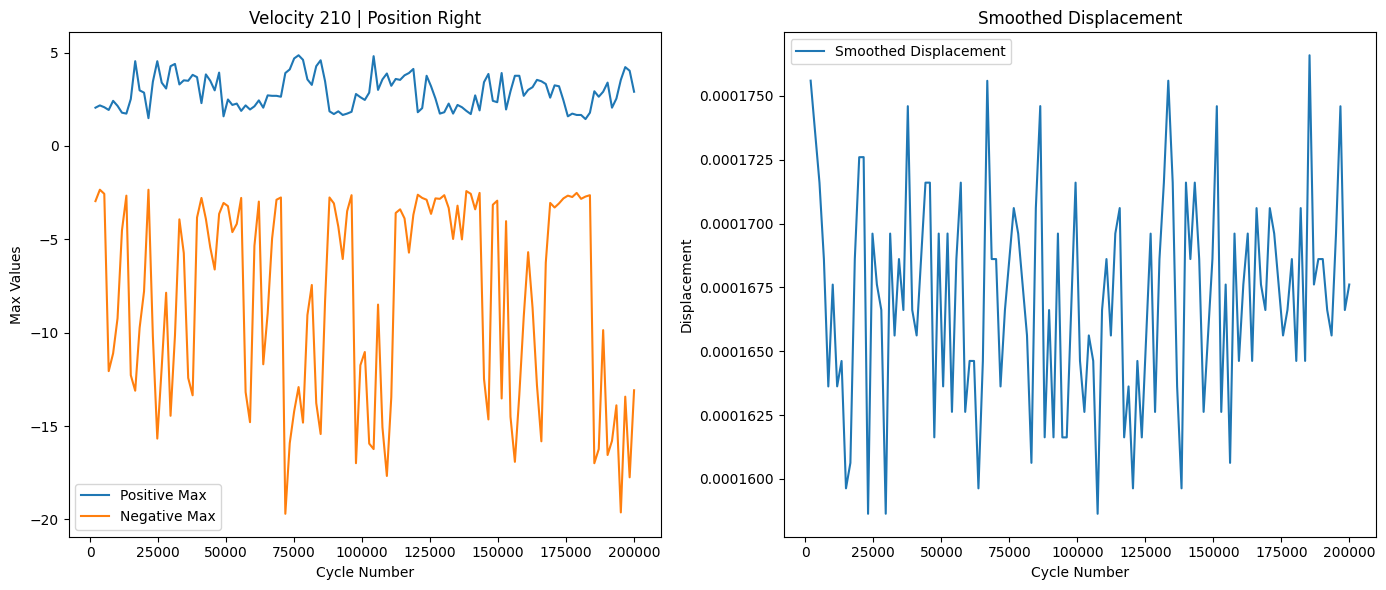

In [12]:
velocity = 210
position = 'Right'
disp_position = 0



# Filtering the required data based on the specified velocity and position
filtered_df = combined_df[(combined_df[8] == velocity) & (combined_df[140] == 2) & (combined_df[141] == position)]

filtered_disp_df = displacement_df[(displacement_df['velocity'] == velocity) & (displacement_df['experiment_number'] == 2) & (displacement_df['position'] == disp_position)]
cycle_number = filtered_df[3]

# Plotting positive_max and negative_max against cycle_number
plt.figure(figsize=(14, 6))

# First subplot for positive_max and negative_max
plt.subplot(1, 2, 1)
plt.plot(cycle_number, filtered_df['positive_max'], label='Positive Max')
plt.plot(cycle_number, filtered_df['negative_max'], label='Negative Max')
plt.xlabel('Cycle Number')
plt.ylabel('Max Values')
plt.title(f'Velocity {velocity} | Position {position}')
plt.legend()

# Second subplot for smoothed_displacement and displacement
plt.subplot(1, 2, 2)
# plt.plot(filtered_disp_df['Cycle_Number'], filtered_disp_df['displacement'], label='Displacement')
plt.plot(filtered_disp_df['Cycle_Number'], filtered_disp_df['smoothed_displacement'], label='Smoothed Displacement')
plt.xlabel('Cycle Number')
plt.ylabel('Displacement')
plt.title('Smoothed Displacement')
plt.legend()

plt.tight_layout()
plt.show()


Correlation Matrix:
                       positive_max  negative_max  smoothed_displacement
positive_max               1.000000     -0.794725               0.020190
negative_max              -0.794725      1.000000              -0.059943
smoothed_displacement      0.020190     -0.059943               1.000000


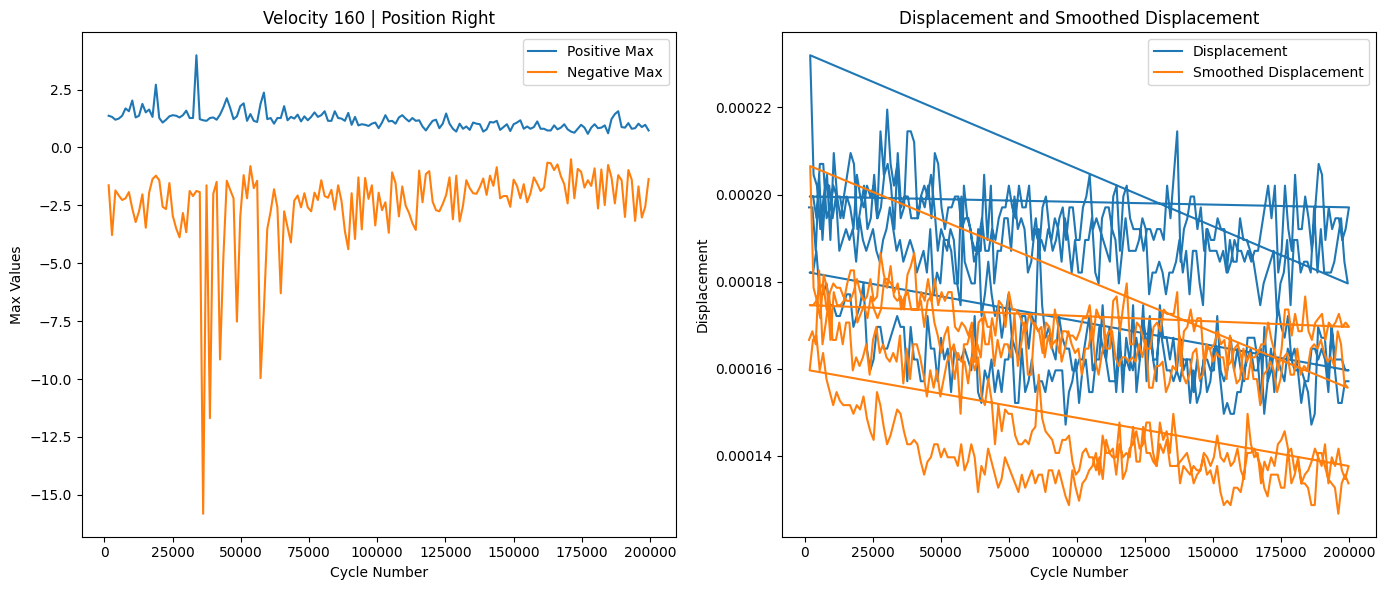

In [13]:
# Define parameters
velocity = 160
position = 'Right'
disp_position = 0

# Filtering combined_df and displacement_df based on specified conditions
filtered_df = combined_df[(combined_df[8] == velocity) & (combined_df[140] == 2) & (combined_df[141] == position)]
filtered_disp_df = displacement_df[(displacement_df['velocity'] == velocity) & (displacement_df['position'] == disp_position)]

# Merging filtered data on cycle number for correlation analysis
merged_df = pd.merge(
    combined_df[[3, 'positive_max', 'negative_max']],
    filtered_disp_df[['Cycle_Number', 'smoothed_displacement']],
    left_on=3, right_on='Cycle_Number',
    how='inner'
)

# Calculating the correlation matrix
correlation_matrix = merged_df[['positive_max', 'negative_max', 'smoothed_displacement']].corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the data
plt.figure(figsize=(14, 6))

# First subplot for positive_max and negative_max
plt.subplot(1, 2, 1)
plt.plot(filtered_df[3], filtered_df['positive_max'], label='Positive Max')
plt.plot(filtered_df[3], filtered_df['negative_max'], label='Negative Max')
plt.xlabel('Cycle Number')
plt.ylabel('Max Values')
plt.title(f'Velocity {velocity} | Position {position}')
plt.legend()

# Second subplot for smoothed_displacement and displacement
plt.subplot(1, 2, 2)
plt.plot(filtered_disp_df['Cycle_Number'], filtered_disp_df['displacement'], label='Displacement')
plt.plot(filtered_disp_df['Cycle_Number'], filtered_disp_df['smoothed_displacement'], label='Smoothed Displacement')
plt.xlabel('Cycle Number')
plt.ylabel('Displacement')
plt.title('Displacement and Smoothed Displacement')
plt.legend()

plt.tight_layout()
plt.show()